# Graded Assignment 2 - Air Quality and Weather in the Netherlands


# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2022-02-06') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


<div class="alert-danger alert" role="alert">
    <b>Important:</b> The use of external libraries, packages, or modules that have not been explicitly imported in the <a href=#Preparation>Preparation</a> part of this assignment is <b>forbidden</b>, with an exception for the final poster task (cf. <a href=#Step-7.-Create-Your-Poster>Step 7. Create Your Poster</a>).
</div>

In [1]:
#// BEGIN_TODO [Author]

AUTHOR_NAME = 'Daniel Tyukov'
AUTHOR_ID_NR = '1819283'
AUTHOR_DATE = '2023-03-28'

#// END_TODO [Author]

---

## Table of Contents

- [Organizational Matters](#Organizational-Matters)
- [Introduction](#Introduction)
    - [Problem Statement](#Problem-Statement)
    - [Development of a Hypothesis](#Development-of-a-Hypothesis)
    - [Personalization of the Assignment](#Personalization-of-the-Assignment)
- [Dataset](#Dataset)
    - [Database Structure](#Database-Structure)
    - [The df_aq and df_weather Data Frames](#The-df_aq-and-df_weather-Data-Frames)
- [Preparation](#Preparation)
    - [Load the Libraries](#Load-the-Libraries)
- [Part 1](#Part-1)
    - [Step 1. Hypothesize](#Step-1.-Hypothesize)
    - [Step 2. Extract Data](#Step-2.-Extract-Data)
    - [Step 3. Air Quality Data Cleaning](#Step-3.-Air-Quality-Data-Cleaning)
    - [Step 4. Weather Data Cleaning](#Step-4.-Weather-Data-Cleaning)
- [Part 2](#Part-2)
    - [Step 5. Rate of Change of Weather Factors](#Step-5.-Rate-of-Change-of-Weather-Factors)
    - [Step 6. Hypothesis Test](#Step-6.-Hypothesis-Test)
- [Part 4](#Part-4)
    - [Step 7. Create Your Poster](#Step-7.-Create-Your-Poster)

---

## Organizational Matters

Welcome to the second graded assignment of the course Data Analytics
for Engineers (2IAB0)! This assignment consists of three parts:

- **Part 1.** The first part aims at preparing your analysis. First, you will sketch a hypothesis to evaluate and refine along the assignment. Then, you will *extract the data* from the database and will foresee how to *clean it* to perform the required analysis to keep or reject your hypothesis. 

- **Part 2.** In the second part of the assignment, you will investigate more closely the relationship between weather factors and air quality compounds. In particular, you will refine and test the *hypothesis* you formulated at the beginning of the assignment. 

- **Part 3.** In the this part of the assignment, you take the lessons that you have learned from the first two parts of the assignment to create a poster on which you report and discuss your findings.

> **Note:** You are required to use the template provided on Canvas for the poster.

The deadline for the graded assignment, involving both the submission of this notebook and your poster, is **Friday, March 31, 2023, at 21:00**.

Your assignment will be graded on three components: 
1. the work in this notebook, graded by Momotor, 
1. your poster, and 
1. the peer review. 

For the precise assessment criteria, see the [study guide on Canvas](https://canvas.tue.nl/courses/21788/pages/study-guide-2iab0-data-analytics-for-engineers).

<div class="alert alert-block alert-danger">
<b>Three very important remarks:</b> <br>
    
1. Ensure that the **visualizations that you include in your poster** are also produced by your notebook and that they follow suggested best practices. **Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab, i.e., make sure that every visualization on your poster can also be seen under that tab.
2. Submit your notebook already before the deadline and make sure **Momotor does not give any errors in any tab**.
3. **Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**.
</div>

---

## Introduction

In the graded assignments of the course, we investigate how concentrations of certain air compounds are influenced by weather factors.
In the previous graded assignment, GA1, we explored the air quality and weather data to define some initial hypotheses. 
In this graded assignment, we will focus on shaping such hypotheses, testing them, and providing insightful conclusions that correlate the concentrations of an air compound with a subset of weather factors. 
To do so, we make use of air quality data coming from the Dutch website [luchtmeetnet](https://www.luchtmeetnet.nl/) and [climatologic data](https://www.knmi.nl/nederland-nu/klimatologie/uurgegevens) collected by the Royal Netherlands Meteorological Institute—a.k.a. Koninklijk Nederlands Meteorologisch Instituut (KNMI).
For more information about these sources, please consult the Introduction of GA1.

### Problem Statement
How do certain weather factors impact air quality? 
Is there a correlation between weather factors and air compounds?
These and other questions are to be answered by the analysis we will perform on the air quality and weather data sources.
Formulating a well-founded hypothesis, testing it, and deriving insightful conclusions from real data is the main goal of this assignment.

**Problem:** Is the concentration of a given air compound in a specific location of the Netherlands influenced by a subset of weather factors?

### Development of a Hypothesis

The work in this assignment will be focused on defining and testing a hypothesis where air quality and weather data are linked. 
In this assignment, you will be asked to formulate your current hypothesis about the relationship between air quality and weather, test it, and provide insightful conclusions.

### Personalization of the Assignment
This assignment is personalized. 
You will focus on the measurements of one air compound from one particular air quality station, and of weather data from the nearest weather station. 
You should have received an **e-mail** at the beginning of GA1 containing:

- the **air quality station code**, which you should store in the variable `aq_station_code` (as a string), and;
- the names of two **air compounds** measuring air quality. You must choose **only one** of those compounds and store it in the variable `compound` (as a string). You are advised to choose the air compound you found most interesting, e.g. the one with the strongest relation to (a) weather factor(s).

In [2]:
#// BEGIN_TODO [Personalization]

aq_station_code = 'NL49014'
compound = 'no_2'

#// END_TODO [Personalization]

aq_station_code, compound

('NL49014', 'no_2')

---

## Dataset 
In this assignment, we will continue using the air quality and weather datasets.
Hereafter, we describe the main tables of the database that contains both datasets as well as the structure of the data frame you need to generate in Part 1 of the assignment.

### Database Structure
The database containing the air quality and weather data is an SQLite database that contains five main tables: the `air_quality_stations`, `air_quality_data`, `weather stations`, `weather_data`, and `close_stations` tables.
We describe the content of each table below.
In particular, we list the table's columns, and for each one of them, we mention its name, type as defined in SQLite, and expected content.
For more information about SQLite types please refer to the [official documentation](https://www.sqlite.org/datatype3.html).

<br>

- **The `air_quality_stations` table:** It contains data about the stations in charge of collecting air quality metrics and their corresponding measures.

    | Column | Type | Description |
    |--------|------|-------------|
    | code | Text | Code of the air quality station. It is the **primary key** of the table. |
    | name | Text | Name of the air quality station. |
    | latitude  | Real | Latitude at which the air quality station is located. |
    | longitude | Real | Longitude at which the air quality station is located. |

<br>

- **The `air_quality_data` table:** It contains data about the air quality measurements collected at the different air quality stations.

    | Column | Type | Description |
    |--------|------|-------------|
    | id   | Integer | Automatically generated identifier of the measurement. It is the **primary key** of the table. |
    | station_code | Text | Code of the air quality station where the measurement was collected. It is a **foreign key** pointing to the `code` column of the `air_quality_stations` table. |
    | datetime     | Timestamp | The Amsterdam winter time when the measurement was collected (UTC+1). |
    | bc   | Real | Black carbon ($\mathrm{C}$) concentration in $\mu \mathrm{g / m}^3$. |
    | co   | Real | Carbon monoxide ($\mathrm{CO}$) concentration in $\mu \mathrm{g / m}^3$. |
    | nh_3 | Real | Ammonia ($\mathrm{NH_3}$) concentration in $\mu \mathrm{g / m}^3$. |
    | no   | Real | Nitrogen monoxide ($\mathrm{NO}$) concentration in $\mu \mathrm{g / m}^3$. |
    | no_2 | Real | Nitrogen dioxide ($\mathrm{NO_2}$) concentration in $\mu \mathrm{g / m}^3$. |
    | no_x | Real | Nitrogen oxides ($\mathrm{NO_x}$) concentration in $\mu \mathrm{g / m}^3$. |
    | o_3  | Real | Ground-level ozone ($\mathrm{O_3}$) concentration in $\mu \mathrm{g / m}^3$. |
    | pm10 | Real | Particle matter 10, i.e., particles less than 10 µm in diameter ($\mathrm{PM10}$) concentration in $\mu \mathrm{g / m}^3$. |
    | pm25 | Real | Particle matter, i.e., particles less than 2.5 µm in diameter ($\mathrm{PM2.5}$) concentration in $\mu \mathrm{g / m}^3$. |
    | so_2 | Real | Sulfur dioxide ($\mathrm{SO_2}$) concentration in $\mu \mathrm{g / m}^3$. |

<br>

- **The `weather_stations` table:** It contains data about the stations in charge of collecting weather metrics and their corresponding measures.

    | Column | Type | Description |
    |--------|------|-------------|
    | code | Text | Code of the weather station. It is the **primary key** of the table. |
    | name | Text | Name of the weather station. |
    | latitude  | Real | Latitude at which the weather station is located. |
    | longitude | Real | Longitude at which the weather station is located. |

<br>

- **The `weather_data` table:** It contains data about the weather measurements collected at the different weather stations.

    | Column | Type | Description |
    |--------|------|-------------|
    | id   | Integer | Automatically generated identifier of the measurement. It is the **primary key** of the table. |
    | station_code | Text | Code of the weather station where the measurement was collected. It is a **foreign key** pointing to the `code` column of the `weather_stations` table. |
    | datetime | Timestamp | The Amsterdam winter time when the measurement was collected (UTC+1). |
    | wind_direction | Integer | Mean wind direction (in degrees) during the 10 minutes preceding the time of observation (360=north, 90=east, 180=south, 270=west, 0=calm 990=variable). |
    | wind_speed | Real | Mean wind speed (in m/s) during the 10 minutes preceding the time of observation. |
    | wind_gust | Real | Maximum wind gust (in m/s) during the hourly division. |
    | temperature | Real | Temperature (in degrees Celsius) at 1.50 m above the ground at the time of observation. | 
    | sunshine_duration | Real | Sunshine duration (in hours) during the hourly division, calculated from global radiation (-1 for <0.05 hour). |
    | global_radiation | Real | Global radiation (in J/cm2) during the hourly division. |
    | precipitation | Real | Hourly precipitation amount (in mm) (-1 for <0.05 mm). |
    | air_pressure | Real | Air pressure (in hPa) reduced to mean sea level, at the time of observation. |
    | visibility | Integer | Horizontal visibility at the time of observation (0=less than 100m, 1=100-200m, 2=200-300m,..., 49=4900-5000m, 50=5-6km, 56=6-7km, 57=7-8km, ..., 79=29-30km, 80=30-35km, 81=35-40km,..., 89=more than 70km). |
    | cloud_cover | Real | Cloud cover (in octants), at the time of observation (0=sky completely clear, ..., 4=sky half cloudy, ..., 8=sky completely cloudy, 9=sky invisible). |
    | humidity | Real | Relative atmospheric humidity (in percentages) at 1.50 m above the ground at the time of observation. |
    | fog | Integer | Fog 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation. |
    | rainfall | Integer | Rainfall 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation. |
    | snow | Integer | Snow 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation. |
    | thunder | Integer | Thunder  0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation. |
    | ice_formation | Integer | Ice formation 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation. |

<br>

- **The `close_stations` table:** It contains data about the distance in kilometers between an air quality station and its closest weather station.

    | Column | Type | Description |
    |--------|------|-------------|
    | aq_station_code      | Text | Code of the air quality station where the measurement was collected. It is a **foreign key** pointing to the `code` column of the `air_quality_stations` table. |
    | weather_station_code | Text | Code of the weather station where the measurement was collected. It is a **foreign key** pointing to the `code` column of the `weather_stations` table. |
    | distance | Real | Distance in kilometers between the air quality and weather station. |

<br>

### The `df_aq` and `df_weather` Data Frames
In this assignment, you will be in charge of creating the two main data frames `df_aq` and `df_weather` from the previously described database.
These data frames are derived from the intermediary data frames `df_aq_raw` and `df_weather_raw`.
The former ones will be later combined into the `df_data` data frame.
The `df_aq` data frame is expected to store relevant data about your air compound, while the `df_weather` data frame is expected to contain weather data collected by the closest weather station to your air quality station—as defined in the personalization part of the assignment.
In this section, we aim at introducing the initial structure of such data frames by listing the data frames' columns together with their Python types.
Notice that this structure might be modified along the assignment.

<br>

- **The `df_aq` data frame:** It contains the concentration measurement of the chosen air compound in your assigned air quality station. 

| Column | Type |
|--------|------|
| datetime | datetime |
| `compound` | float |

<br>

- **The `df_weather` data frame:** It contains the weather data of a subset of weather factors collected from the closest weather station to your air quality station.

| Column | Type |
|--------|------|
| datetime | datetime |
| temperature | float |
| global_radiation | float |
| precipitation | float |
| air_pressure | float |
| visibility | int |
| wind_direction | int |
| wind_speed | float |

---

## Preparation

This section introduces the steps and tasks that you need to perform for the assignment.
It also includes introductory code to set up your development and data environments.

### Load the Libraries

We load the necessary libraries.

In [3]:
import numpy as np
import pandas as pd

import sqlite3                                            # to interact with the database
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline                                 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns                                     # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5                    # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1                 # to fix issue with seaborn box plots; needed after import seaborn

from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

---

## Part 1

### Step 1. Hypothesize

#### Task 1. Sketch a hypothesis

We want to investigate whether the concentration of your air compound at your air quality measurement station is different under particular weather conditions. 
To do so, formulate a hypothesis about the concentration of your compound at your measurement station in relation to **one** weather factor. 
Choose this weather factor from the following list:
- `temperature`,
- `global_radiation`,
- `precipitation`,
- `air_pressure`,
- `visibility`, 
- `wind_direction`, or
- `wind_speed`.

Your hypothesis must be defined based on your own research and analyses.
For instance, you can leverage analyses performed in GA1 to provide a more robust hypothesis.
Assign your hypothesis to a variable named `H_draft`.
This hypothesis will guide the development of the following task and will be refined later in the assignment.

In [4]:
#// BEGIN_TODO [Hypothesis_Draft] (1 point)

H_draft = 'The concentration of NO2 at the measurement station is higher when the wind speed is lower'

In [5]:
#// END_TODO [Hypothesis_Draft]

### Step 2. Extract Data

#### Task 1. Extract air quality data
Extract the concentrations of **only** your chosen air compound at your air quality measurement station from the database. To do so, follow the steps below:
1. Connect to the SQLite database `aqw.db` located in the `files` folder. 
1. Define an SQL query to extract the concentrations of your compound at your air quality station from the `air_quality_data` table. In particular, the query should retrieve the timestamp at which the measurement was taken (`datetime`) and the concentrations of the chosen compound (`compound`). Store such a query in the variable `QUERY_AQ`.
1. Use Pandas to run the SQL query on the database and store the data as a data frame in the variable `df_aq_raw`. Keep the names of the columns as they are originally defined in the database, and ensure the `datetime` values are parsed as dates. Ensure the data frame is indexed by the `datetime` column. 

>**Notes:**
>- You can use the `read_sql_query` and its keyword parameter `parse_dates` to read the `datetime` values as dates. The official documentation can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html).
>- Dates in the database are set to the Amsterdam winter timezone—that is, UTC+1. No winter-summer time changes are reflected in the database as this might bring inconsistencies when analyzing the data. Thus, there is no need to perform any kind of timezone or UTC conversion.

In [6]:
#// BEGIN_TODO [Extract_AQ] (3 points)

conn = sqlite3.connect('files/aqw.db')
QUERY_AQ = 'SELECT datetime, no_2 FROM air_quality_data WHERE station_code = "NL49014"'
df_aq_raw = pd.read_sql_query(QUERY_AQ, conn, parse_dates=['datetime'], index_col='datetime')

In [7]:
#// END_TODO [Extract_AQ]

#### Task 2. Extract weather data

Extract the relevant weather data from the database. To do so, follow the steps below:
1. Reconnect to the SQLite database `aqw.db` located in the `files` folder.
1. Write **one** SQL query to extract weather data from the `weather_data` table for the weather station paired with your air quality station in the `close_stations` table. In the `close_stations` table there is only one weather station associated with each air quality station, namely the closest one. Extract **only** the measurements of the following weather factors from the `weather_data` table:
    - `temperature`,
    - `global_radiation`,
    - `precipitation`,
    - `air_pressure`,
    - `visibility`, 
    - `wind_direction`, and
    - `wind_speed`.

    Store the used SQL query as a string in `QUERY_WEATHER`.
1. Store the extracted data as a data frame in the `df_weather_raw` variable. Keep the names of the columns as they are originally defined in the database, and ensure the `datetime` values are parsed as dates. Index the data frame by the `datetime` column.

>**Notes:**
>- To deal with the `datetime` column consider the Step 1 Task 1 **Notes**.
>- You can also use one SQL query to extract the weather station paired with your air quality station from the `close_stations` table, and a second separate SQL query to obtain the required weather data from the `weather_data` table. However, you can then obtain at most 3 points for this task.

In [8]:
#// BEGIN_TODO [Extract_Weather] (4 points)

conn = sqlite3.connect('files/aqw.db')
QUERY_WEATHER = 'SELECT datetime, temperature, global_radiation, precipitation, air_pressure, visibility, wind_direction, wind_speed FROM weather_data WHERE station_code = (SELECT weather_station_code FROM close_stations WHERE aq_station_code = "NL49014")'
df_weather_raw = pd.read_sql_query(QUERY_WEATHER, conn, parse_dates=['datetime'], index_col='datetime')

In [9]:
#// END_TODO [Extract_Weather]

### Step 3. Air Quality Data Cleaning

In GA1, the air quality and weather data you used had already been cleaned. 
However, this time you are in charge of cleaning the data before it can be analyzed. 
We will start with the cleaning of the air quality data stored in `df_aq_raw`.

Before the air quality data gets published on [luchtmeetnet](https://www.luchtmeetnet.nl), it is [validated](https://www.luchtmeetnet.nl/informatie/overige/validatie-data). 
That means that the data is most likely clean, except there can still be missing or negative values. While the latter is nonsensical, there is a good statistical reason for this, which is explained [here](https://www.luchtmeetnet.nl/informatie/overige/negatieve-waarden) (unfortunately in Dutch only). 
Therefore, we choose to keep these values.

#### Task 1. Identify missing data
Determine for how many hours (rows) there are missing values for your `compound` in the air quality data (`df_aq_raw`). 
A missing value is represented in Pandas data frames with the value `NaN` (Not a Number). 
Store your answer in the variable `nr_aq_missing`.

In [10]:
#// BEGIN_TODO [Clean_AQ_Missing] (2 points)

nr_aq_missing = df_aq_raw[compound].isna().sum()

In [11]:
#// END_TODO [Clean_AQ_Missing]

#### Task 2. Replace missing data
Remove the interior missing values by applying linear interpolation to the air quality data (`df_aq_raw`). 
Limit the number of consecutive missing values to be filled by 2 (i.e. 2 hours), which means leaving gaps larger than 2 as they are.
Store the interpolated data as a single-column data frame in `df_aq` with the name of your air compound. 
`df_aq_raw` should remain unchanged!

>**Note:**
Further investigate the `interpolate` method to perform the linear interpolation. To restrict the linear interpolation have a look at the `limit` keyword parameter.

In [12]:
#// BEGIN_TODO [Clean_AQ_Replace] (2 points)

df_aq = df_aq_raw[compound].interpolate(limit=2).to_frame()

In [13]:
#// END_TODO [Clean_AQ_Replace]

#### Task 3. Evaluate interpolated data
Now that the linear interpolation has been performed, count the number of missing values in the interpolated data in the same way you did in Task 1. 
Assign the result to `nr_aq_missing_interpolated`. 
Compute how many missing values were replaced by the interpolation, and store it in the `nr_aq_replaced` variable. 
Did the interpolation replace the majority of the missing values? 
For the missing values that remain (if any), why were they not replaced? 
Store your answers to these questions in the string variable `interpolation_observation`.

In [14]:
#// BEGIN_TODO [Clean_AQ_Eval_Interpolation] (3 points)

nr_aq_missing_interpolated = df_aq[compound].isna().sum()
nr_aq_replaced = nr_aq_missing - nr_aq_missing_interpolated
interpolation_observation = 'The interpolation did NOT replace the majority of the missing values But has replaced a lot. The remaining missing values were not replaced because of insufficient data to interpolate. For example it is common to have consecutive NaN values which contribute to this.'

In [15]:
#// END_TODO [Clean_AQ_Eval_Interpolation]

#### Task 4. Remove the remaining missing data

If there are still missing values amongst the interpolated data, remove these rows from `df_aq` data frame. 
Ensure you modify the `df_aq` data frame directly.

In [16]:
#// BEGIN_TODO [Clean_AQ_Finalize] (2 points)

df_aq = df_aq.dropna()

In [17]:
#// END_TODO [Clean_AQ_Finalize]

### Step 4. Weather Data Cleaning

In contrast to the air quality data, the weather data should already be (almost) clean in terms of missing values. Therefore, we investigate whether the values make sense in this step.

#### Task 1. Analyze weather data
Create a data frame `df_weather_summary` that, for every column in `df_weather_raw`, contains **only** the mean, the median, the maximum, and the minimum value of the weather factor of that column. 
The `df_weather_summary` data frame should be indexed by `min`, `mean`, `median` and `max`.
Examine the output by printing the data frame.

Do you observe any strange values in `df_weather_summary`? Assign your answer to `weather_summary_observations`.
Consult the dataset explanation for the weather data at the start of this notebook to provide meaningful observations. 

**Note:** You can also create boxplots to observe the distributions of the weather factors and support your observation.

In [18]:
#// BEGIN_TODO [Clean_Weather_Analyze] (2 points)

df_weather_summary = df_weather_raw.agg(['min', 'mean', 'median', 'max'])
print(df_weather_summary.to_string())

weather_summary_observations = 'Some of the anomalies like precipitation having negative values are not possible, also the wind speed of 990 being an unknown direction as max. Also wind speed of 0 is suspicious and unrealtistic.'

        temperature  global_radiation  precipitation  air_pressure  visibility  wind_direction  wind_speed
min      -17.800000          0.000000      -1.000000     968.70000    0.000000        0.000000      0.0000
mean      11.036998         44.546628       0.006691    1015.18394   65.409132      196.457022      4.8836
median    10.700000          2.000000       0.000000    1015.80000   69.000000      200.000000      4.0000
max       36.100000        374.000000      26.500000    1047.70000   83.000000      990.000000     24.0000


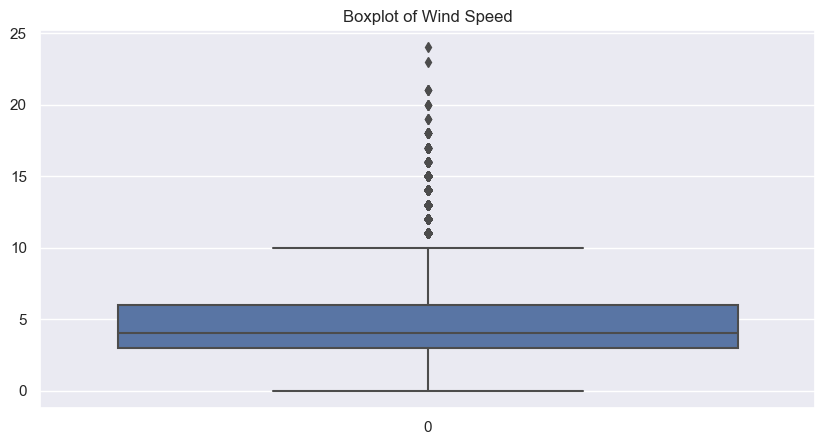

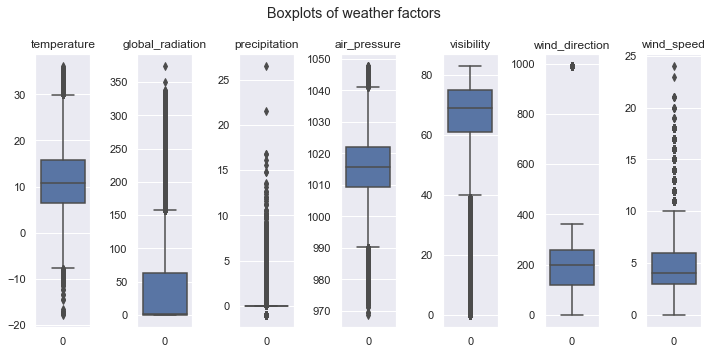

In [19]:
fig, ax_weather = plt.subplots(figsize=(10, 5), dpi=100)
sns.boxplot(data=df_weather_raw['wind_speed'], ax=ax_weather)
plt.title('Boxplot of Wind Speed')

weather_factors = ['temperature', 'global_radiation', 'precipitation', 'air_pressure', 'visibility', 'wind_direction', 'wind_speed']

fig, ax = plt.subplots(1, 7)
for i in range(7):
    sns.boxplot(data=df_weather_raw[weather_factors[i]], ax=ax[i])
    ax[i].set_title(weather_factors[i])
fig.suptitle('Boxplots of weather factors')
fig.tight_layout()

In [20]:
#// END_TODO [Clean_Weather_Analyze]

#### Task 2. Replace values

As you might have noticed in the previous task, thanks to the official documentation describing the weather data, we know that:
1. For the `wind_direction` weather factor, a value of `990` represents a variable or unknown direction.
2. The `precipitation` weather factor can have negative reported values.

We want to replace these measurements with either zero or `NaN`, depending on the documentation of the weather factor in question. 
In particular, `990` must be replaced with `NaN` values (`np.nan`) in the `wind_direction` column, and negative numbers must be replaced with zero (`0`) in the `precipitation` column.
Do not alter `df_weather_raw` itself, instead, store the cleaned data frame in the `df_weather` variable.

In [21]:
#// BEGIN_TODO [Clean_Weather_Replace] (4 points)

df_weather = df_weather_raw.copy()
df_weather['wind_direction'] = df_weather['wind_direction'].replace(990, np.nan)
df_weather['precipitation'] = df_weather['precipitation'].clip(lower=0)

In [22]:
#// END_TODO [Clean_Weather_Replace]

---

## Part 2

### Step 5. Rate of Change of Weather Factors
Now that the data has been cleaned, we can start performing some analyses on it to understand better the data and refine our hypothesis. 
In this step, we will examine the rate of change of the weather factors in the `df_weather` data frame. 
We will do so by using numerical differentiation.

>**Note:** Exclusively use `df_weather` and `df_aq` in this step, so **not** the original data.

#### Task 1. Approximate derivatives
For every weather factor in the `df_weather` data frame, compute a numerical approximation of its derivative using the central difference method:
    $$p'(t_i) \approx \frac{p_{i+1} - p_{i-1}}{t_{i+1} - t_{i-1}},$$
where $t_i$ is the time **in hours** of the $i\text{th}$ measurement and $p_i$ is the value of a weather factor at time $t_i$.

You should assume that the time difference between all consecutive rows in the `df_weather` data frame is one hour. 
Assign the results to columns labeled `d_{weather_factor}` (e.g `d_wind_direction`) in the `df_weather` data frame.

>**Hint:**
To get the previous or next value of a given row of a `Series` or `DataFrame` object, you can use the `shift` method. 
Concretely, to get the **next row** value(s) you either use `<column_name>.shift(-1)` to act only on one column or `<dataframe_name>.shift(-1)` to act on the whole data frame, and;
to get the **previous row** value(s) you use `<column_name>.shift(1)` or `<dataframe_name>.shift(1)` in the same way as described before.

In [23]:
#// BEGIN_TODO [RoC_Derivatives] (4 points)

for weather_factor in weather_factors:
    df_weather['d_' + weather_factor] = (df_weather[weather_factor].shift(-1) - df_weather[weather_factor].shift(1))

In [24]:
#// END_TODO [RoC_Derivatives]

#### Task 2. Visualize numerical derivatives
For the 1st of April 2019 up to and including the 7th of April 2019, plot your air compound concentration and the numerical derivatives of three weather factors of choice.
The figure must consist of four stacked (**not** superimposed) line plots sharing the $x$-axis.

We have chosen the aforementioned dates for the following reasons:
- We only want to consider one week of data to better identify daily patterns.
- April is a transitional month when considering seasons, meaning that extreme weather conditions are not to be expected during this month.
- 2019 is the most recent year that is not impacted by COVID-19 influence on the behavior of people.

Do the numerical derivatives you plotted communicate relevant insights to you? 
Can you discern any trends or relations between the weather factors? 
Store your observations as a string in the `derivatives_observations` variable.

> **Note:** Don't forget to follow the best practices for visualizations. This applies to **all** visualizations in this notebook. For instance:
> - Include a descriptive **title**.
> - Add **labels** to the **axes** and include the **units** of the quantities on the axes if applicable.
> - Ensure that the plot is **readable** and **understandable** (also for somebody who is color-blind).
> - Choose appropriate **ranges** for the plot **axes**.
> - Include a **legend**, in particular when combining several plots.

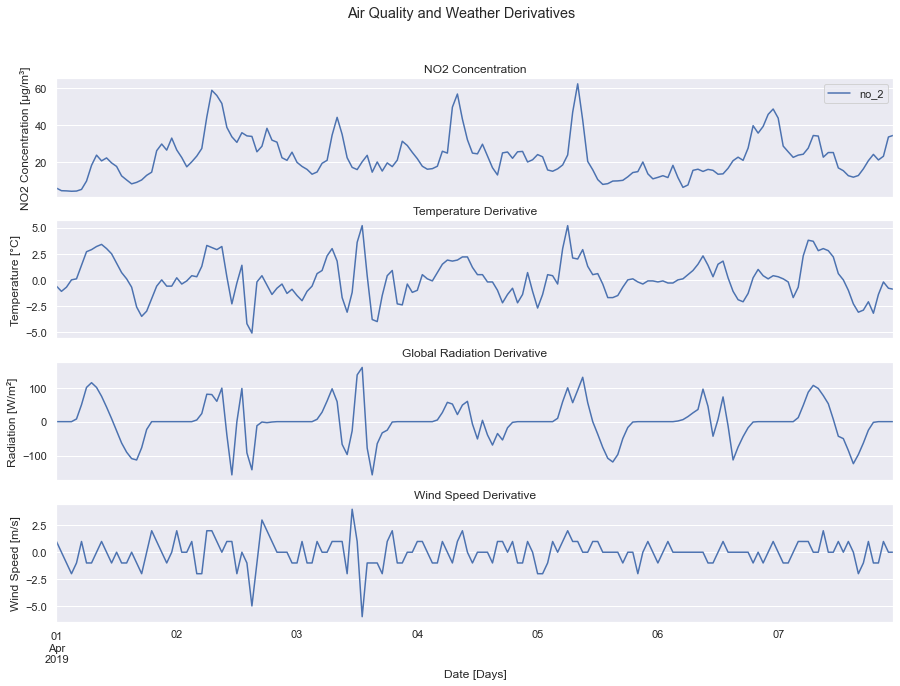

In [25]:
#// BEGIN_TODO [RoC_Visualization] (4 points)

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15, 10))

ax[0].set_title('NO2 Concentration')
df_aq['2019-04-01':'2019-04-07'].plot(ax=ax[0])

ax[1].set_title('Temperature Derivative')
df_weather['2019-04-01':'2019-04-07']['d_temperature'].plot(ax=ax[1])

ax[2].set_title('Global Radiation Derivative')
df_weather['2019-04-01':'2019-04-07']['d_global_radiation'].plot(ax=ax[2])

ax[3].set_title('Wind Speed Derivative')
df_weather['2019-04-01':'2019-04-07']['d_wind_speed'].plot(ax=ax[3])

fig.suptitle('Air Quality and Weather Derivatives')
ax[0].set_ylabel('NO2 Concentration [µg/m³]')
ax[1].set_ylabel('Temperature [°C]')
ax[2].set_ylabel('Radiation [W/m²]')
ax[3].set_ylabel('Wind Speed [m/s]')
ax[3].set_xlabel('Date [Days]');

derivatives_observations = 'The relation between Radiation/Temperature and NO2 is very clear: The higher those 2 parameters are the higher the NO2 concentration is. But for the wind speed the relation is not that clear. In GA1 the observation conducted a more thorow analsis to proove such hypothesis. Meanwhile here data over longer periods must be observed to conclude my original hypothesis.'


In [26]:
#// END_TODO [RoC_Visualization]

### Step 6. Hypothesis Test

You have previously defined a hypothesis about the relationship between the concentration of your air compound at your air quality measurement station and specific weather factors. 
After extracting and cleaning the data and performing additional analyses, it is time to to refine this hypothesis so that it can be tested. But first, we create the dataset on which this test will be performed.

#### Task 1. Restrict data

We will need to be a bit careful however in designing a good test. 
The hypothesis tests that we have seen in class assume independent data, and with the time series data that we currently have, such an assumption is not justified. 
One option to make the data a bit more independent is to prune the data first (only consider a subset of the data). 
(As an alternative to restriction, we could also have used a form of data grouping.)
Moreover, there may (or may not) be seasonal effects on your compound concentration.

To reduce the influence of such effects (and other confounding factors) on our hypothesis test, we want to restrict the data to a shorter time span.
In particular, you have to restrict the data to **only** the measurements recorded in **April or May**—which also happen to be season-transitional months—**at 12:00**. Proceed as follows:
1. Create the data frame `df_data_full`, which contains both the cleaned air quality from `df_aq` and the cleaned weather data from `df_weather`. The index of `df_data_full` should be the **intersection** of the indices of `df_aq` and `df_weather`. That is, a datetime should only appear in the index of `df_data_full` if it is present in both `df_aq` and `df_weather`.

    >**Note:** the `DataFrame.join` method with keyword `how` might be useful.

1. Create a boolean mask called `restriction_mask`, that contains for every datetime in the index of `df_data_full` whether it is 12:00 (in the Europe/Amsterdam winter timezone) of a day from either April or May (both months must be considered).

1. Create the data frame `df_data` by applying `restriction_mask` to `df_data_full`. This is the data frame on which you will be performing your hypothesis test.

In [27]:
#// BEGIN_TODO [Hypothesis_Restrict] (3 points)

df_data_full = df_aq.join(df_weather, how='inner')
restriction_mask = (df_data_full.index.hour == 12) & ((df_data_full.index.month == 4) | (df_data_full.index.month == 5))
df_data = df_data_full[restriction_mask]

In [28]:
df_data

,no_2,temperature,global_radiation,precipitation,air_pressure,visibility,wind_direction,wind_speed,d_temperature,d_global_radiation,d_precipitation,d_air_pressure,d_visibility,d_wind_direction,d_wind_speed
datetime,,,,,,,,,,,,,,,
2012-04-01 12:00:00+01:00,13.0,8.5,163.0,0.0,1018.5,73.0,290.0,7.0,-0.5,-21.0,0.0,-0.8,-4.0,0.0,1.0
2012-04-02 12:00:00+01:00,37.0,12.6,117.0,0.0,1009.8,75.0,240.0,4.0,0.4,-29.0,0.0,-1.4,-3.0,60.0,2.0
2012-04-03 12:00:00+01:00,32.0,13.6,205.0,0.0,1002.8,64.0,240.0,3.0,1.2,58.0,0.0,-0.5,0.0,-20.0,-1.0
2012-04-04 12:00:00+01:00,22.0,7.4,45.0,0.0,1010.3,50.0,60.0,5.0,-0.2,3.0,0.0,0.8,-6.0,-20.0,1.0
2012-04-05 12:00:00+01:00,27.0,7.8,181.0,0.0,1019.3,68.0,50.0,6.0,1.2,52.0,0.0,-0.5,1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27 12:00:00+01:00,18.0,12.0,76.0,0.0,1018.9,75.0,320.0,7.0,0.3,23.0,0.0,1.4,5.0,20.0,0.0
2021-05-28 12:00:00+01:00,14.0,16.9,269.0,0.0,1024.4,82.0,90.0,3.0,0.8,-4.0,0.0,-0.5,0.0,-90.0,1.0
2021-05-29 12:00:00+01:00,5.1,15.7,246.0,0.0,1027.7,80.0,20.0,4.0,1.4,110.0,0.0,0.2,1.0,350.0,0.0


In [29]:
#// END_TODO [Hypothesis_Restrict]

#### Task 2. Hypothesize
Refine the hypothesis you defined at the beginning of the assignment about the concentration of your compound at your measurement station in relation to **one** weather factor. You can now also formulate the hypothesis based on the derivative of one of the weather factors. For instance, you might suspect that the concentration of your compound is influenced more by the rate of change of a weather factor than by the value of that weather factor.

Remember that you should choose the weather factor from the following list (or its derivative):
- `temperature`,
- `global_radiation`,
- `precipitation`
- `air_pressure`,
- `visibility`,
- `wind_direction`, or
- `wind_speed`.

Store the weather factor or the weather factor derivative (prefixed with `d_` as in Step 5, Task 1) on which you base your hypotheses in `chosen_weather_variable` as a string. 

Formulate the hypothesis in terms of a null and a one- or two-sided alternative hypothesis in such a way that it can be tested either with a hypothesis test for equality of means or proportions, where the concentration data of your compound is divided into two samples based on a threshold for `chosen_weather_variable` (see next task).

>**Example** of null and alternative hypotheses for testing for equality of means based on temperature:  
>$H_0$ : The average concentration of `compound` is the same regardless of whether it is hot or cold.  
>$H_a$ : The average concentration of `compound` is the higher when it is hot.

Store your null hypothesis as a string in the variable `H_0` and store the alternative hypothesis in the variable `H_a`.

> **Notes:** 
> - For inspiration, you can consult some of the visualizations you created in GA1, for instance, the heatmap.
> - Only consider the type of hypothesis you have seen in your lectures.

In [30]:
#// BEGIN_TODO [Hypothesis_Final] (1 point)

chosen_weather_variable = 'wind_speed'
H_0 = 'The average concentration of NO2 is the same regardless of whether it is windy or not.'
H_a = 'The average concentration of NO2 is lower when it is windy.'

# I choose wind_speed and NOT d_wind_speed (change of wind speed) does not seem to affect the NO2 concentration as much as the actual levels proven in the previous analysis.

In [31]:
#// END_TODO [Hypothesis_Final]

#### Task 3. Discretize weather factors
To use the chosen weather factor (derivative) for a hypothesis test, we need to be able to divide the data into two samples based on that variable. We will do this using a threshold value.

1. To determine what a good threshold value is, create a kernel density plot of your `chosen_weather_variable` using the restricted data from `df_data`. The threshold should be chosen in such a way that it meaningfully splits the data into two parts.
1. Once you have determined a threshold, store it in the variable `weather_threshold`. 
1. Add a Boolean column called `threshold_exceeded` to `df_data`, indicating for all rows whether `weather_threshold` is (strictly) exceeded by  `chosen_weather_variable`.
1. Why did you choose that threshold? Provide the rationale and assign your answer to `weather_threshold_observations`.

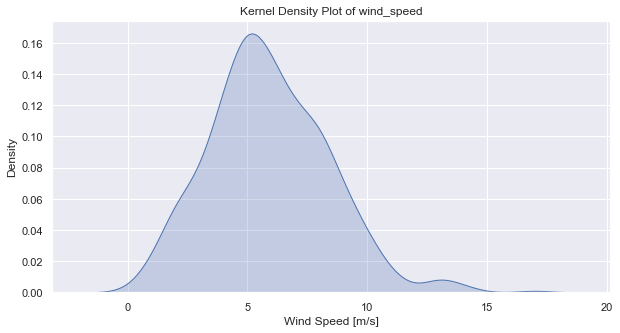

The median of the wind speed is: 6.0


c:\Users\mail\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\mail\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
#// BEGIN_TODO [Hypothesis_Discretize] (5 points)

sns.kdeplot(data=df_data[chosen_weather_variable], shade=True)
plt.title('Kernel Density Plot of ' + chosen_weather_variable)
# label the axes
plt.xlabel("Wind Speed [m/s]")
plt.ylabel('Density')
plt.show()

weather_threshold = df_data[chosen_weather_variable].median()
print('The median of the wind speed is: ' + str(weather_threshold))

df_data.loc[:, 'threshold_exceeded'] = df_data[chosen_weather_variable] > weather_threshold

# The median of the wind speed is: 6.0
weather_threshold_observations = 'The median of the wind speed is 6.0 m/s. This is a good threshold to distinguish between windy and non-windy days. Since it is when we notice a a direct decrease in NO2 concentration and also as shown with the count plot the overall datapoints that account towards NO2 measurement.'


In [33]:
# print the theshold_exceeded column
df_data

,no_2,temperature,global_radiation,precipitation,air_pressure,visibility,wind_direction,wind_speed,d_temperature,d_global_radiation,d_precipitation,d_air_pressure,d_visibility,d_wind_direction,d_wind_speed,threshold_exceeded
datetime,,,,,,,,,,,,,,,,
2012-04-01 12:00:00+01:00,13.0,8.5,163.0,0.0,1018.5,73.0,290.0,7.0,-0.5,-21.0,0.0,-0.8,-4.0,0.0,1.0,True
2012-04-02 12:00:00+01:00,37.0,12.6,117.0,0.0,1009.8,75.0,240.0,4.0,0.4,-29.0,0.0,-1.4,-3.0,60.0,2.0,False
2012-04-03 12:00:00+01:00,32.0,13.6,205.0,0.0,1002.8,64.0,240.0,3.0,1.2,58.0,0.0,-0.5,0.0,-20.0,-1.0,False
2012-04-04 12:00:00+01:00,22.0,7.4,45.0,0.0,1010.3,50.0,60.0,5.0,-0.2,3.0,0.0,0.8,-6.0,-20.0,1.0,False
2012-04-05 12:00:00+01:00,27.0,7.8,181.0,0.0,1019.3,68.0,50.0,6.0,1.2,52.0,0.0,-0.5,1.0,0.0,-1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-27 12:00:00+01:00,18.0,12.0,76.0,0.0,1018.9,75.0,320.0,7.0,0.3,23.0,0.0,1.4,5.0,20.0,0.0,True
2021-05-28 12:00:00+01:00,14.0,16.9,269.0,0.0,1024.4,82.0,90.0,3.0,0.8,-4.0,0.0,-0.5,0.0,-90.0,1.0,False
2021-05-29 12:00:00+01:00,5.1,15.7,246.0,0.0,1027.7,80.0,20.0,4.0,1.4,110.0,0.0,0.2,1.0,350.0,0.0,False


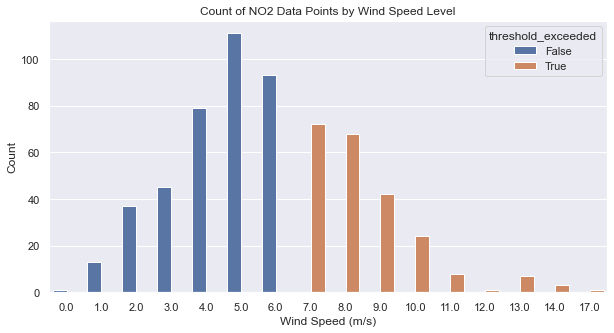

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df_data, x='wind_speed', hue='threshold_exceeded', ax=ax)

plt.title('Count of NO2 Data Points by Wind Speed Level')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Count')

plt.show()

# showcase less NO2 in general being able to be measured due ot higher wind speeds

In [35]:
#// END_TODO [Hypothesis_Discretize]

#### Task 4. Test for normality
To choose an adequate method to test your hypothesis, you might need to create two normally distributed data samples of your **air compound concentration**, where such samples are created based on the threshold from the previous task. Test whether this is the case using the Anderson-Darling test. To do so, perform the following steps:
1. Create two data frames. The first data frame must be named `df_threshold_ex` and must contain all the data for which the threshold chosen in Task 2 has been exceeded. 
On the contrary, the second data frame must be named `df_threshold_not_ex` and must contain the remainder of the data points. Do not remove any column coming from `df_data` from your data frames.

    >**Note:** you can use the column `threshold_exceeded` you created in the previous task to do this.
1. Compute the number of data points in each data frame and store their values in `threshold_ex_num` and `threshold_not_ex_num`, respectively.
1. Create two separate kernel density plots of your **air compound concentration**, one for each sample (i.e. `df_threshold_ex` and `df_threshold_not_ex`), to visually verify if the data is normally distributed.
1. Perform the Anderson-Darling test for both samples of your **air compound concentration**.
Provide the $p$-values for both samples and store them in the `p_exceeded` and `p_not_exceeded`, respectively. 
Note that you may need to drop the `NaN` values first before you can apply this normality test (this can be done with the method `dropna`).
1. Compare the computed $p$-values (i.e. `p_exceeded` and `p_not_exceeded`) against a significance level of 0.05 to determine whether or not the two samples are normally distributed, and store the Boolean results in the `exceeded_normal` and `not_exceeded_normal` variables.

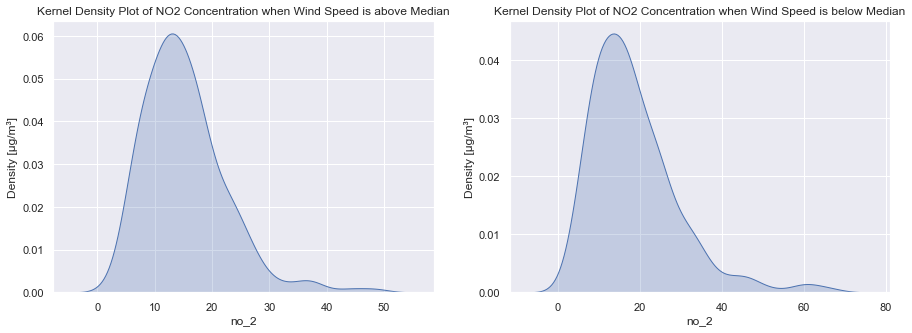

In [36]:
#// BEGIN_TODO [Hypothesis_Normality] (5 points)

# step 1
df_threshold_ex = df_data[df_data['threshold_exceeded'] == True]
df_threshold_not_ex = df_data[df_data['threshold_exceeded'] == False]

# step 2
threshold_ex_num = df_threshold_ex.shape[0]
threshold_not_ex_num = df_threshold_not_ex.shape[0]
# threshold_ex_num = len(df_threshold_ex)
# threshold_not_ex_num = len(df_threshold_not_ex)

# step 3
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(data=df_threshold_ex[compound], shade=True, ax=ax[0])
ax[0].set_title('Kernel Density Plot of NO2 Concentration when Wind Speed is above Median')
ax[0].set_ylabel('Density [µg/m³]')
sns.kdeplot(data=df_threshold_not_ex[compound], shade=True, ax=ax[1])
ax[1].set_title('Kernel Density Plot of NO2 Concentration when Wind Speed is below Median')
ax[1].set_ylabel('Density [µg/m³]')
plt.show()

# step 4
p_exceeded = sm.stats.normal_ad(df_threshold_ex[compound].dropna())[1]
p_not_exceeded = sm.stats.normal_ad(df_threshold_not_ex[compound].dropna())[1]

# step 5
exceeded_normal = p_exceeded > 0.05
not_exceeded_normal = p_not_exceeded > 0.05

In [37]:
print('The p-value for the exceeded normality test is: ' + str(p_exceeded))
print('The p-value for the not exceeded normality test is: ' + str(p_not_exceeded))
print('The exceeded normality test is: ' + str(exceeded_normal))
print('The not exceeded normality test is: ' + str(not_exceeded_normal))

The p-value for the exceeded normality test is: 4.358464993020445e-08
The p-value for the not exceeded normality test is: 2.391201992749958e-22
The exceeded normality test is: False
The not exceeded normality test is: False


In [38]:
#// END_TODO [Hypothesis_Normality]

#### Task 5. Test hypothesis
It is time to test your hypothesis using the t-test or the proportions z-test, depending on whether your hypothesis concerns means or proportions.
However, do you need the air compound data samples to be normally distributed in order to use this test? 
Provide your answer as a Boolean in the variable `need_normality` and provide an argumentation as a string in the variable `need_normality_considerations`.

Regardless of whether or not you need normality, and whether or not the samples are normal (cf. Task 4), conduct your hypothesis test.
Store the $p$-value of your hypothesis test in the variable `p_value`. 
Provide a confidence interval as a tuple in the variable `conf_int` for the difference in means or proportions of the two samples (which are based on exceeding or not exceeding `weather_threshold`) of your compound.
You should use a significance level of 0.05.

Finally, discuss your hypothesis test. 
For instance, to what extent is it reasonable to assume that the measurement data is independently distributed? 
Store your answer as a string in the variable `hypothesis_test_discussion`.

In [39]:
#// BEGIN_TODO [Hypothesis_Test] (5 points)

# setp 1
need_normality = False
need_normality_considerations = 'The p-value for the exceeded and (not) normality test is below 0.05. The exceeded normality test is: False. This means that the data is not normally distributed. The Kernel plots are right skewed.'

# step 2
p_value = sm.stats.ttest_ind(df_threshold_ex[compound].dropna(), df_threshold_not_ex[compound].dropna(), alternative='smaller')[1]
conf_int = sm.stats.DescrStatsW(df_threshold_ex[compound].dropna()).tconfint_mean(alpha=0.05, alternative='smaller')

# step 3
hypothesis_test_discussion = 'The p-value is below 0.05. This means that we can reject the null hypothesis. The confidence interval is: ' + str(conf_int) + '. This means that the average concentration of NO2 is lower when it is windy. Which confirms our study.'

In [40]:
# print p-value and confidence interval
print('The p-value is: ' + str(p_value))
print('The confidence interval is: ' + str(conf_int))

The p-value is: 1.9412370179776785e-05
The confidence interval is: (-inf, 15.979935538226652)


In [41]:
#// END_TODO [Hypothesis_Test]

---

## Part 3

### Step 7. Create Your Poster
Finally, create a poster on which you present and discuss your results. 
You can find more information on how to create your poster on Canvas. 
Ensure you include (paraphrased) some of the discussion strings you wrote for this notebook (such as the `reflection` above).
We encourage you to use the space below to create extra visualizations and possibly perform extra computations for your poster.
For example, you can change the analyzed air quality station to verify if your conclusions hold for other stations in the dataset.
(Beware that it might be the case that other stations do not measure your chosen compound.)
Ensure you set the `aq_station_code` variable back to the station we provided you for the personalization part of the assignment!

<div class="alert alert-block alert-danger">
Also, ensure:
    <ol>
        <li>You include supporting empirical evidence for your hypothesis in your poster.</li>
        <li><b>The visualizations that you include in your poster, are also produced by your notebook.</b></li>
        <li>Double-check if the visualizations are produced correctly on Momotor under the <b>Running submitted notebook</b> tab.</li>
    </ol>
</div>

> **Note:** You are allowed to import additional libraries for this task, but make sure they do not cause errors in Momotor.

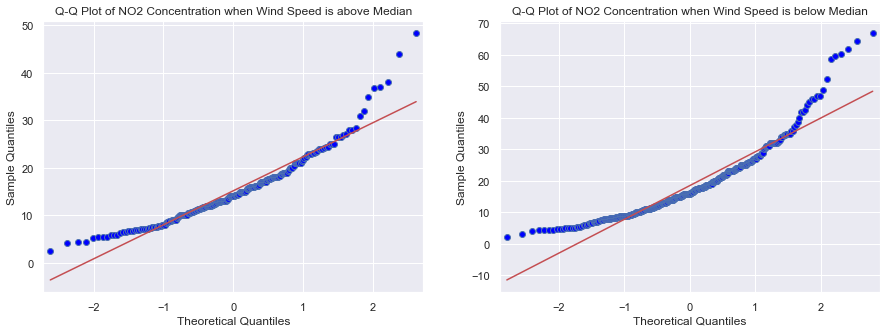

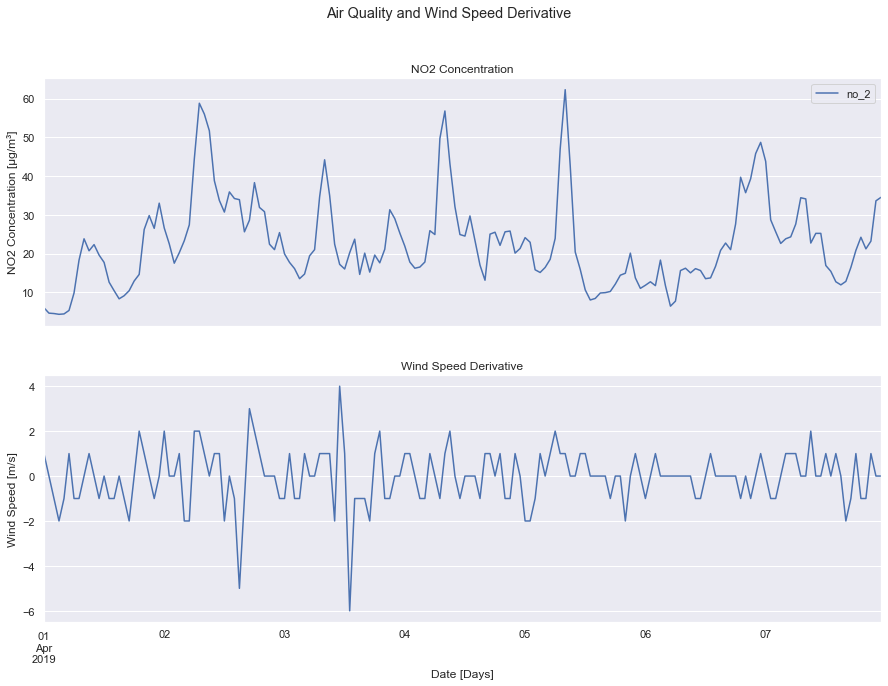

In [42]:
#// BEGIN_TODO [Poster]

# Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sm.qqplot(df_threshold_ex[compound].dropna(), line='s', ax=ax[0])
ax[0].set_title('Q-Q Plot of NO2 Concentration when Wind Speed is above Median')
sm.qqplot(df_threshold_not_ex[compound].dropna(), line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of NO2 Concentration when Wind Speed is below Median')
plt.show()

# Rat of Change Plot
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax[0].set_title('NO2 Concentration')
df_aq['2019-04-01':'2019-04-07'].plot(ax=ax[0])

ax[1].set_title('Wind Speed Derivative')
df_weather['2019-04-01':'2019-04-07']['d_wind_speed'].plot(ax=ax[1])

fig.suptitle('Air Quality and Wind Speed Derivative')
ax[0].set_ylabel('NO2 Concentration [µg/m³]')
ax[1].set_ylabel('Wind Speed [m/s]')
ax[1].set_xlabel('Date [Days]');

In [43]:
#// END_TODO [Poster]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [44]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

feedback_time = 6

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

6

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [45]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

feedback_difficulty = 6

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

6

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [46]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [47]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [48]:
# List all defined names
%whos

Variable                         Type           Data/Info
---------------------------------------------------------
AUTHOR_DATE                      str            2023-03-28
AUTHOR_ID_NR                     str            1819283
AUTHOR_NAME                      str            Daniel Tyukov
ECDF                             type           <class 'statsmodels.distr<...>rical_distribution.ECDF'>
HTML                             type           <class 'IPython.core.display.HTML'>
H_0                              str            The average concentration<...>ether it is windy or not.
H_a                              str            The average concentration<...>s lower when it is windy.
H_draft                          str            The concentration of NO2 <...>n the wind speed is lower
QUERY_AQ                         str            SELECT datetime, no_2 FRO<...> station_code = "NL49014"
QUERY_WEATHER                    str            SELECT datetime, temperat<...>station_code = "NL49014")

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology